# First laboratory

## Step 1 - Subsample with main variables

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
sub_sample_columns = ['Organic_carbon', 'ph', 'Chloramines']
sub_sample = data[sub_sample_columns]
sub_sample = sub_sample[sub_sample.isna().sum(axis=1) == 0]
sub_sample.sample(n=10)

,Organic_carbon,ph,Chloramines
3051,15.430418,8.862868,7.131704
2342,16.167186,7.835907,8.137484
1522,17.051185,8.249551,7.019971
2393,18.016760,8.655299,7.271299
633,10.842095,5.433242,7.286392
2830,12.367109,7.146020,6.652035
413,9.657360,5.742110,6.202721
1717,16.214966,7.691486,7.690728
966,15.233826,7.366915,5.584369
1747,11.783383,5.986594,8.940430


## Step 2 - non-parametric estimation of PDF

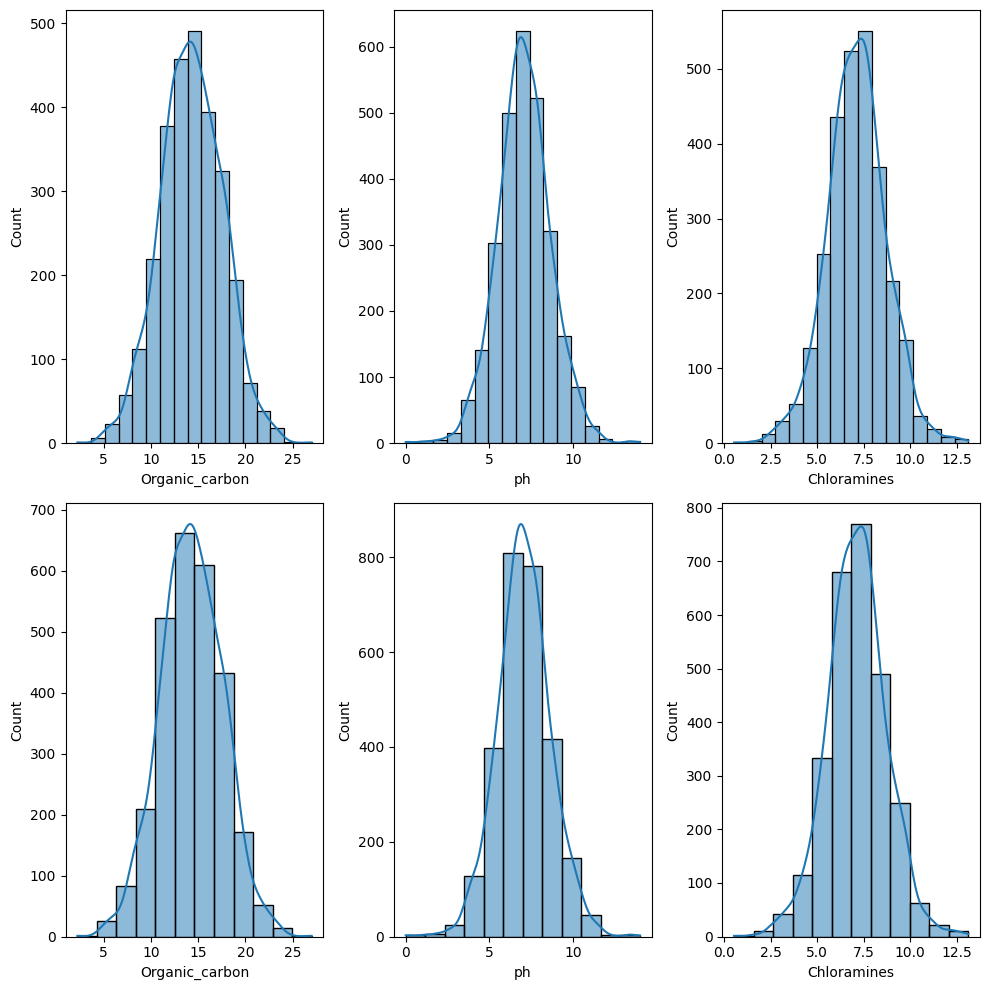

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

bins_count = [np.rint(np.log10(sub_sample.shape[0]) * 5), np.rint(1 + 3.32 * np.log10(sub_sample.shape[0]))]
bins_count = np.array(bins_count, dtype=np.int32)

fig, ax = plt.subplots(len(bins_count), len(sub_sample_columns), figsize=(10, 10), tight_layout=True)

for bin_index, bin_count in enumerate(bins_count):
    for col_index, column in enumerate(sub_sample_columns):
        sns.histplot(
            sub_sample[column],
            kde=True,
            bins=bin_count,
            ax=ax[bin_index][col_index],
        )
plt.savefig('./figures/pdf.png', bbox_inches='tight')

## Step 3 - estimation of order statistics

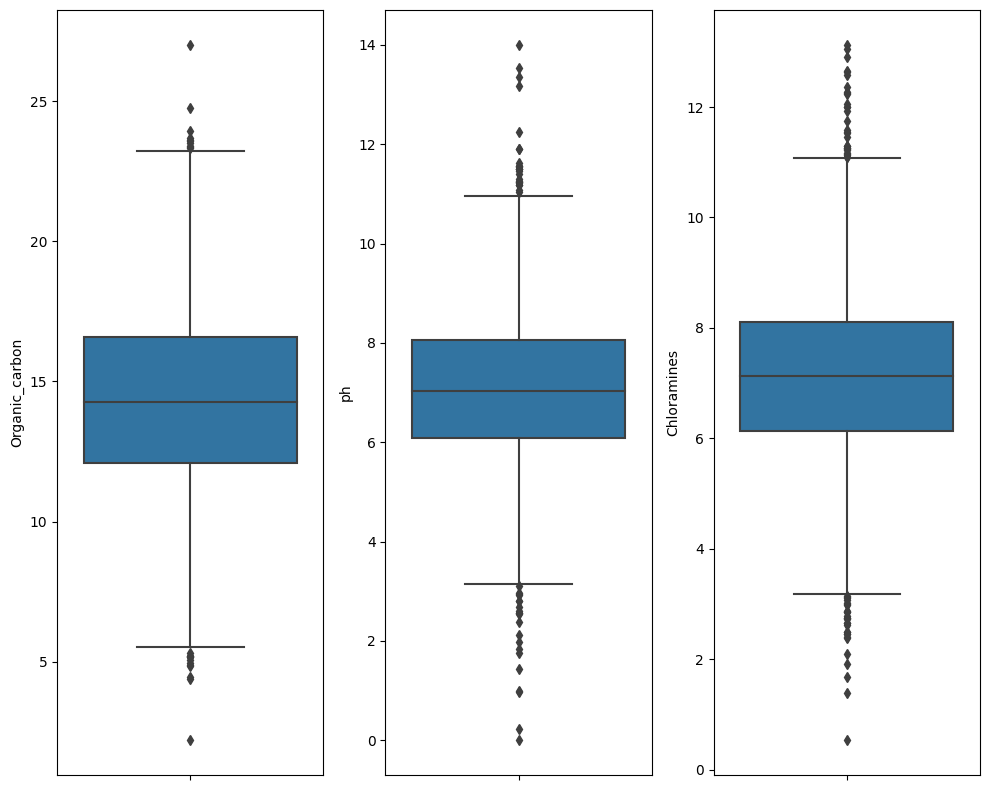

In [4]:
fig, ax = plt.subplots(1, len(sub_sample_columns), figsize=(10, 8), tight_layout=True)

for col_index, column in enumerate(sub_sample_columns):
    sns.boxplot(y=sub_sample[column], ax=ax[col_index])

plt.savefig('./figures/quantiles.png', bbox_inches='tight')

## Step 4 - theoretical distributions

In [5]:
import scipy


def plot_density(sample_data, x_points, function_class, function_args, name):
    fig, ax = plt.subplots(1, 1, tight_layout=True)
    sns.histplot(
        sample_data,
        bins=bins_count[0],
        ax=ax,
        stat="density"
    )
    ax.plot(
        np.linspace(*x_points),
        function_class.pdf(np.linspace(*x_points), *function_args),
        label=name
    )
    ax.legend(loc='best'),
    plt.savefig(f'./figures/{name}.png')
    plt.show()

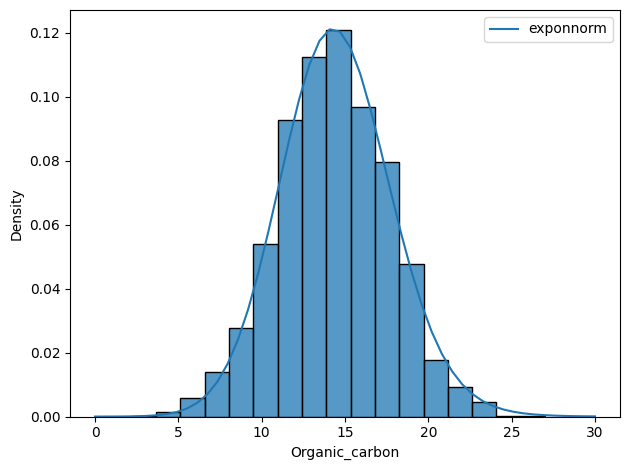

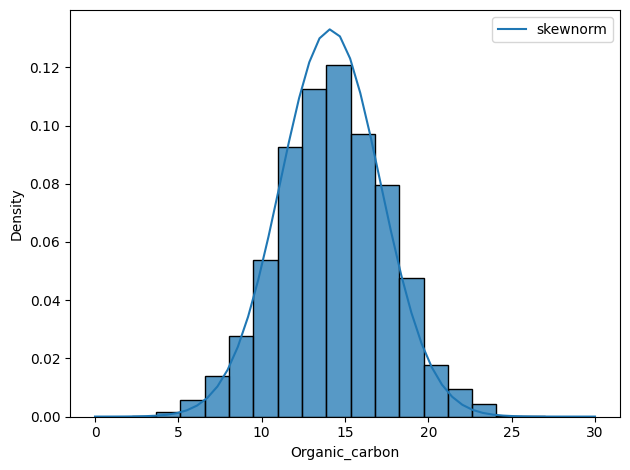

In [6]:
plot_density(sub_sample[sub_sample_columns[0]], (0, 30), scipy.stats.exponnorm, (0.5, 13, 3), 'exponnorm')
plot_density(sub_sample[sub_sample_columns[0]], (0, 30), scipy.stats.skewnorm, (0.05, 14, 3), 'skewnorm')

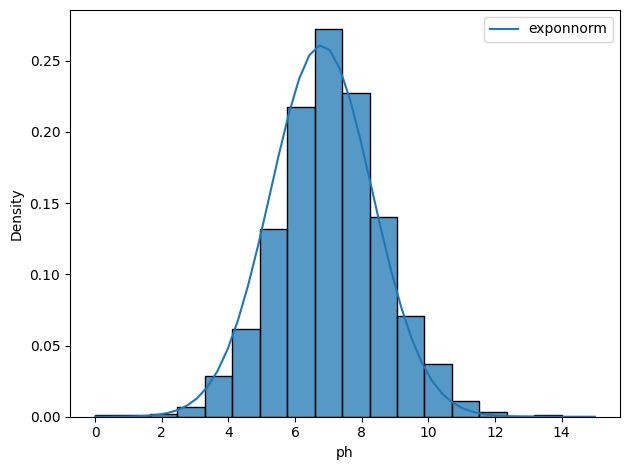

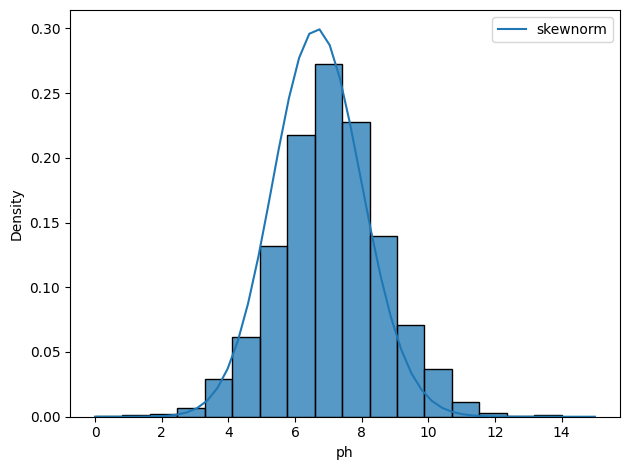

In [7]:
plot_density(sub_sample[sub_sample_columns[1]], (0, 15), scipy.stats.exponnorm, (0.2, 6.5, 1.5), 'exponnorm')
plot_density(sub_sample[sub_sample_columns[1]], (0, 15), scipy.stats.skewnorm, (0.7, 6, 1.5), 'skewnorm')

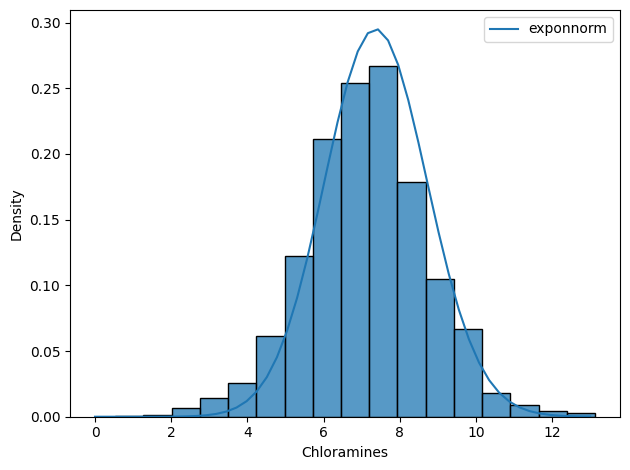

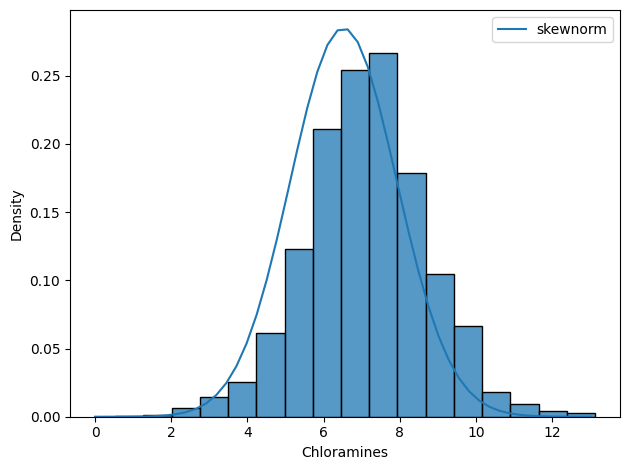

In [8]:
plot_density(sub_sample[sub_sample_columns[2]], (0, 13), scipy.stats.exponnorm, (0.3, 7, 1.3), 'exponnorm')
plot_density(sub_sample[sub_sample_columns[2]], (0, 13), scipy.stats.skewnorm, (0.5, 6, 1.5), 'skewnorm')

## Step 5 - estimate distribution parameters

### Maximum likelihood method

In [9]:
def mlm_method(function, data):
    return function.fit(data, method='MLE')

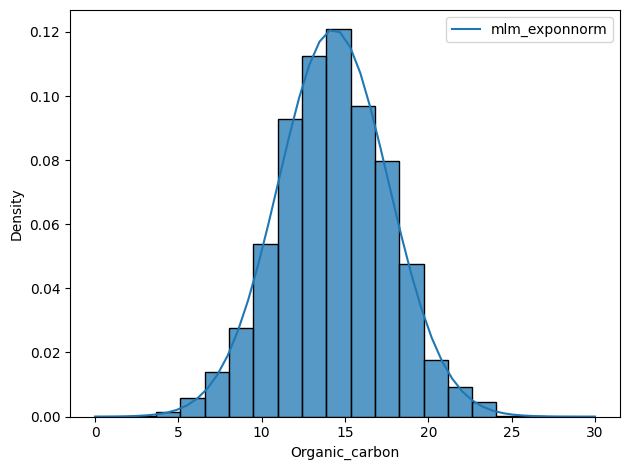

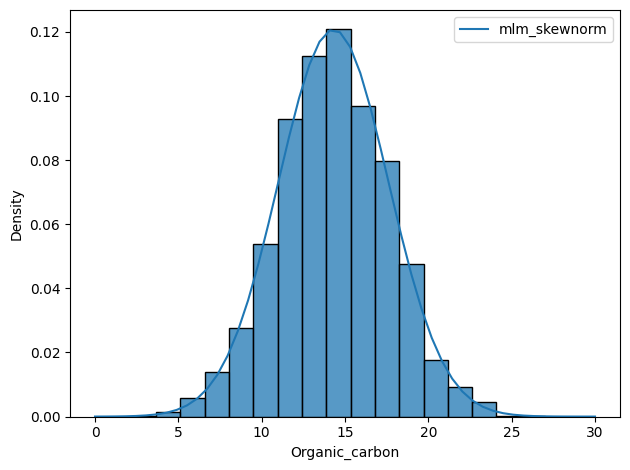

In [10]:
plot_density(
    sub_sample[sub_sample_columns[0]],
    (0, 30),
    scipy.stats.exponnorm,
    mlm_method(scipy.stats.exponnorm, sub_sample[sub_sample_columns[0]]),
    'mlm_exponnorm'
)
plot_density(
    sub_sample[sub_sample_columns[0]],
    (0, 30),
    scipy.stats.skewnorm,
    mlm_method(scipy.stats.skewnorm, sub_sample[sub_sample_columns[0]]),
    'mlm_skewnorm'
)

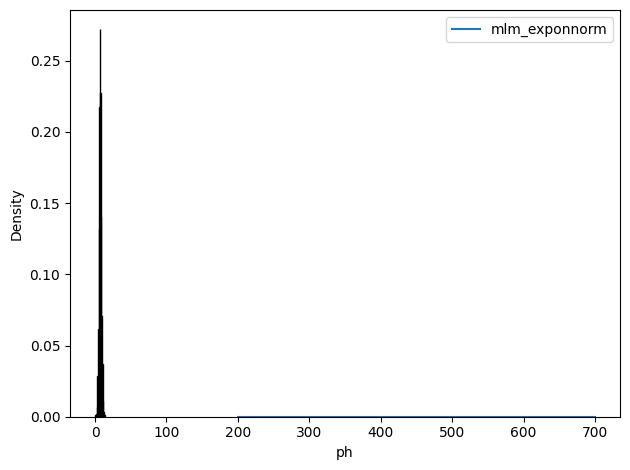

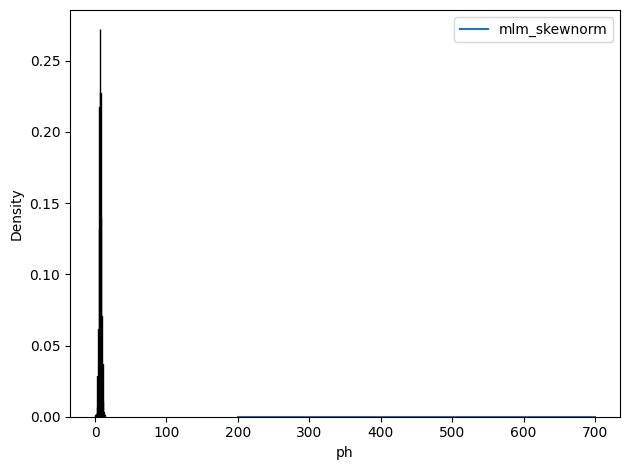

In [11]:
plot_density(
    sub_sample[sub_sample_columns[1]],
    (200, 700),
    scipy.stats.exponnorm,
    mlm_method(scipy.stats.exponnorm, sub_sample[sub_sample_columns[1]]),
    'mlm_exponnorm'
)
plot_density(
    sub_sample[sub_sample_columns[1]],
    (200, 700),
    scipy.stats.skewnorm,
    mlm_method(scipy.stats.skewnorm, sub_sample[sub_sample_columns[1]]),
    'mlm_skewnorm'
)

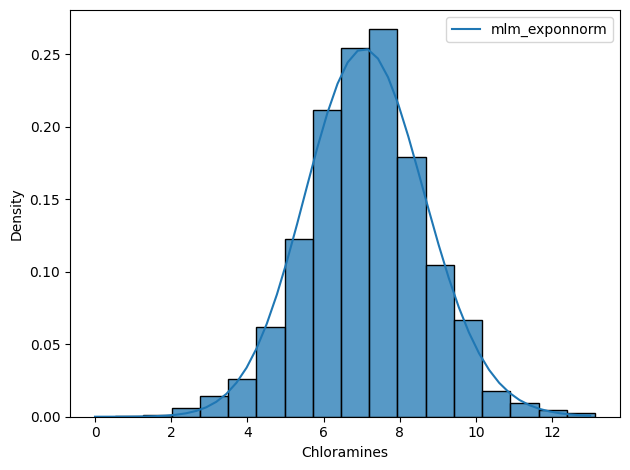

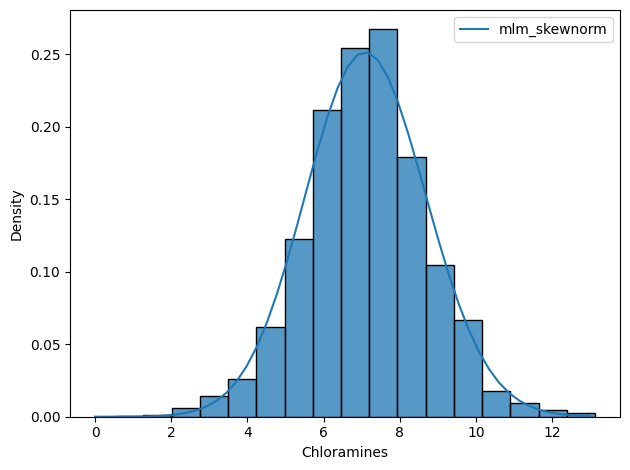

In [12]:
plot_density(
    sub_sample[sub_sample_columns[2]],
    (0, 13),
    scipy.stats.exponnorm,
    mlm_method(scipy.stats.exponnorm, sub_sample[sub_sample_columns[2]]),
    'mlm_exponnorm'
)
plot_density(
    sub_sample[sub_sample_columns[2]],
    (0, 13),
    scipy.stats.skewnorm,
    mlm_method(scipy.stats.skewnorm, sub_sample[sub_sample_columns[2]]),
    'mlm_skewnorm'
)

### Least squares method.

In [13]:
def lsm_method(function_class, data):
    def function(point, a, b, c):
        return function_class.pdf(point, a, b, c)
    y, x = np.histogram(data, bins=bins_count[0], density=True)
    ls, _ = scipy.optimize.curve_fit(function, xdata=x[:bins_count[0]], ydata=y[:bins_count[0]], method='lm')
    return ls

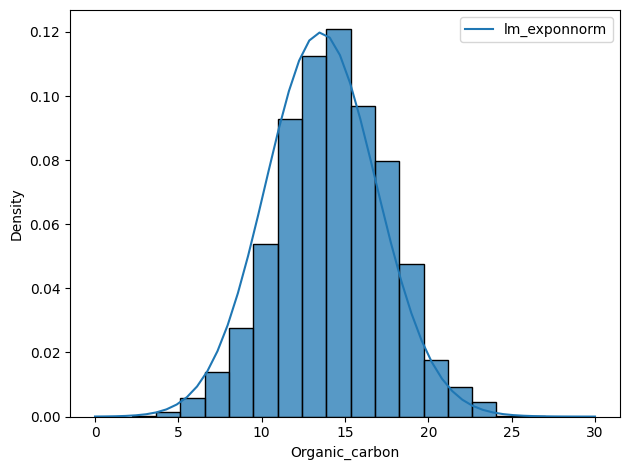

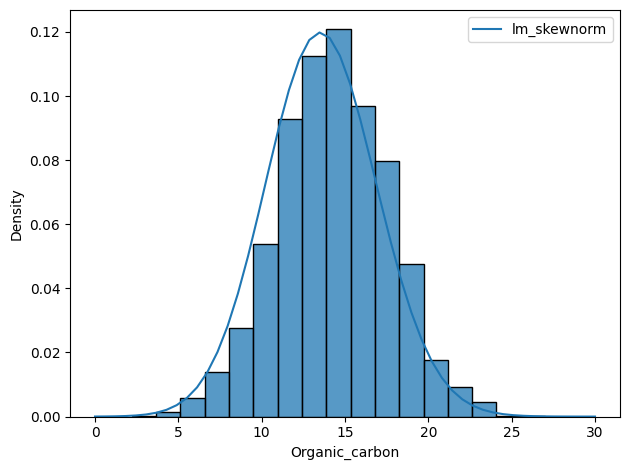

In [14]:
plot_density(
    sub_sample[sub_sample_columns[0]],
    (0, 30),
    scipy.stats.exponnorm,
    tuple(lsm_method(scipy.stats.exponnorm, sub_sample[sub_sample_columns[0]])),
    'lm_exponnorm'
)
plot_density(
    sub_sample[sub_sample_columns[0]],
    (0, 30),
    scipy.stats.skewnorm,
    tuple(lsm_method(scipy.stats.skewnorm, sub_sample[sub_sample_columns[0]])),
    'lm_skewnorm'
)

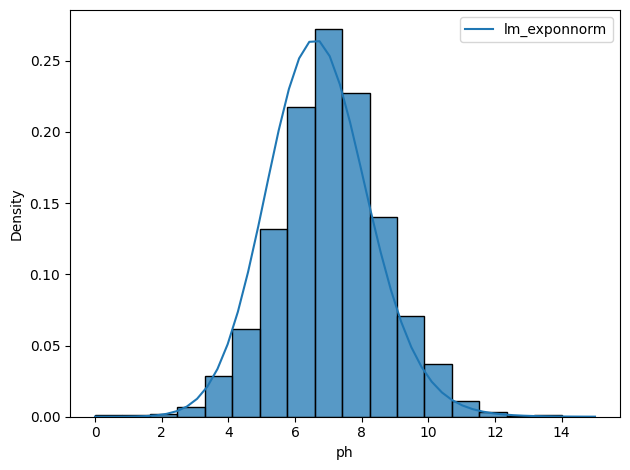

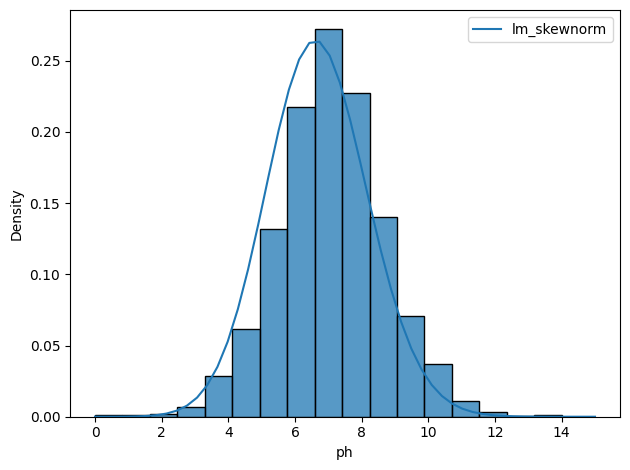

In [15]:
plot_density(
    sub_sample[sub_sample_columns[1]],
    (0, 15),
    scipy.stats.exponnorm,
    tuple(lsm_method(scipy.stats.exponnorm, sub_sample[sub_sample_columns[1]])),
    'lm_exponnorm'
)
plot_density(
    sub_sample[sub_sample_columns[1]],
    (0, 15),
    scipy.stats.skewnorm,
    tuple(lsm_method(scipy.stats.skewnorm, sub_sample[sub_sample_columns[1]])),
    'lm_skewnorm'
)

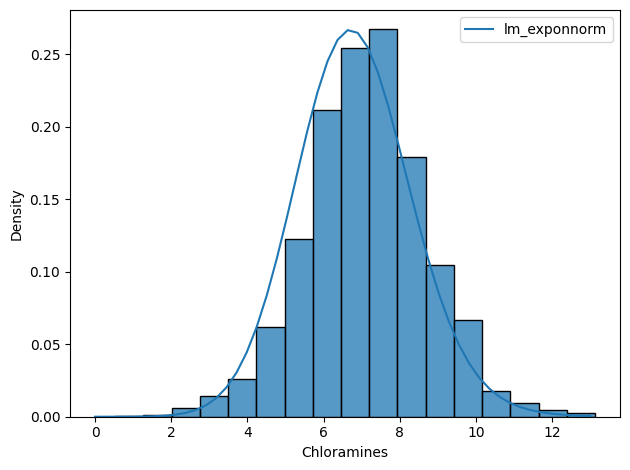

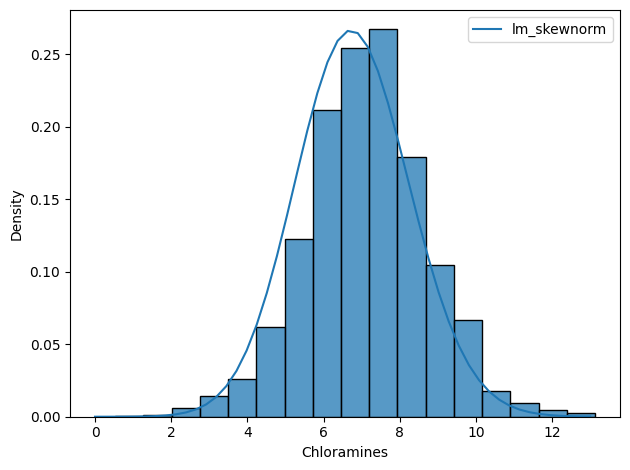

In [16]:
plot_density(
    sub_sample[sub_sample_columns[2]],
    (0, 13),
    scipy.stats.exponnorm,
    tuple(lsm_method(scipy.stats.exponnorm, sub_sample[sub_sample_columns[2]])),
    'lm_exponnorm'
)
plot_density(
    sub_sample[sub_sample_columns[2]],
    (0, 13),
    scipy.stats.skewnorm,
    tuple(lsm_method(scipy.stats.skewnorm, sub_sample[sub_sample_columns[2]])),
    'lm_skewnorm'
)

## Step 6 - validation via QQ biplots

In [17]:
def b_plot(function_class, data, name):
    fig, ax = plt.subplots(1, 1)
    args = function_class.fit(data)
    scipy.stats.probplot(data, dist=function_class, sparams=args, plot=ax)
    ax.set_title(name)
    plt.savefig(f'figures/{name}.png')
    plt.show()

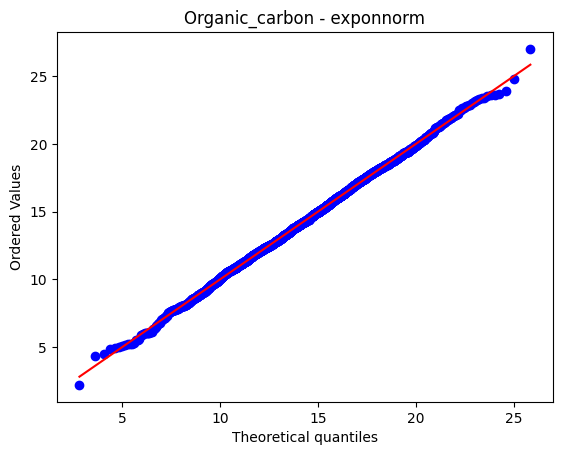

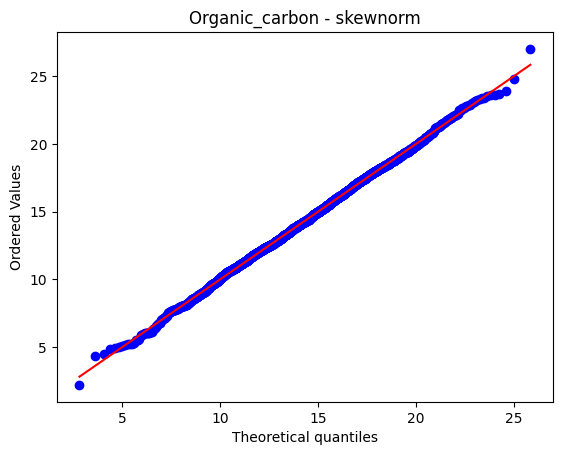

In [18]:
b_plot(scipy.stats.exponnorm, sub_sample[sub_sample_columns[0]], f'{sub_sample_columns[0]} - exponnorm')
b_plot(scipy.stats.skewnorm, sub_sample[sub_sample_columns[0]], f'{sub_sample_columns[0]} - skewnorm')

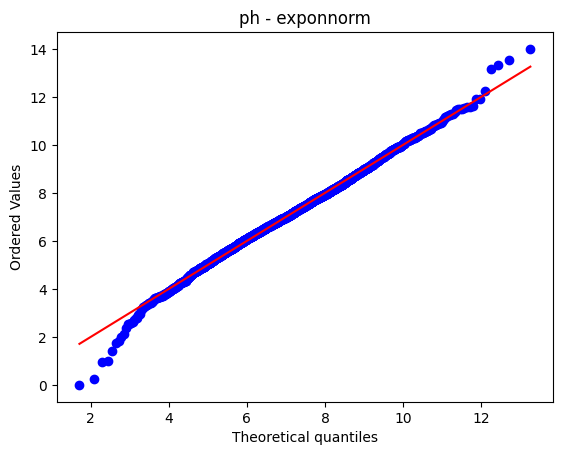

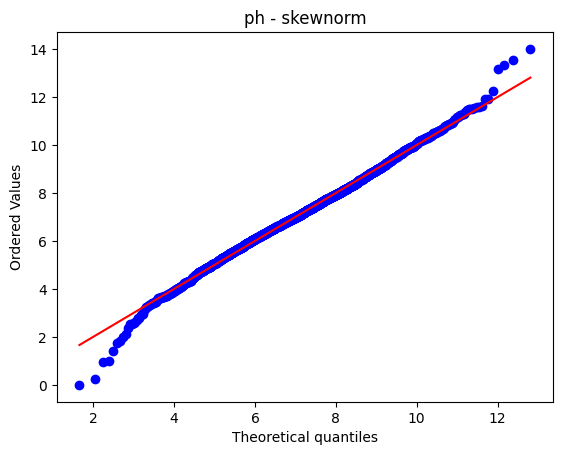

In [19]:
b_plot(scipy.stats.exponnorm, sub_sample[sub_sample_columns[1]], f'{sub_sample_columns[1]} - exponnorm')
b_plot(scipy.stats.skewnorm, sub_sample[sub_sample_columns[1]], f'{sub_sample_columns[1]} - skewnorm')

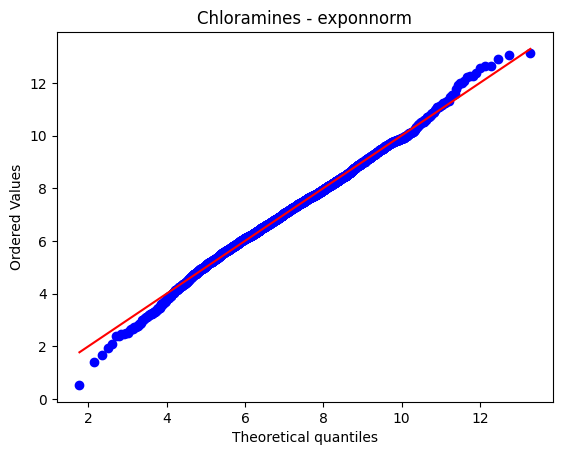

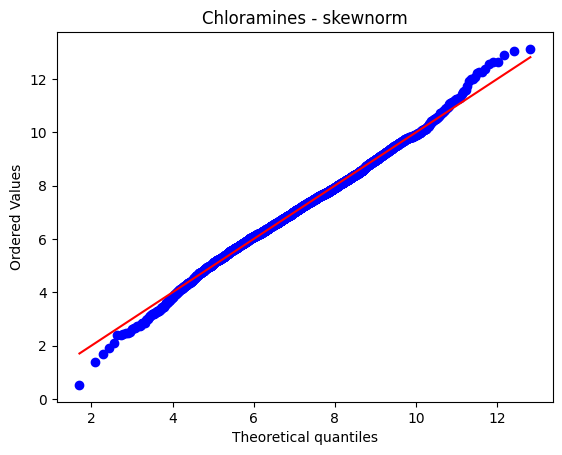

In [20]:

b_plot(scipy.stats.exponnorm, sub_sample[sub_sample_columns[2]], f'{sub_sample_columns[2]} - exponnorm')
b_plot(scipy.stats.skewnorm, sub_sample[sub_sample_columns[2]], f'{sub_sample_columns[2]} - skewnorm')

## Step 7 - statistical tests

In [21]:
def stat_tests(function_class, data):
    args = function_class.fit(data)
    k_test = scipy.stats.kstest(rvs=data, cdf=function_class.cdf, args=args).pvalue
    cvm_test = scipy.stats.cramervonmises(rvs=data, cdf=function_class.cdf, args=args).pvalue
    return k_test, cvm_test

def plot_test(function_class, data, name):
    k_test, cvm_test = stat_tests(function_class, data)
    print(name)
    print(f'\t Kolmogorov-Smirnov test - {k_test}')
    print(f'\t Cramer–Von Mises test - {cvm_test}')

In [22]:
for func, func_name in zip([scipy.stats.skewnorm, scipy.stats.exponnorm], ['skewnorm', 'exponnorm']):
    for column in sub_sample_columns:
        plot_test(func, sub_sample[column], f'{func_name} for {column}')


skewnorm for Organic_carbon
	 Kolmogorov-Smirnov test - 0.7648883357738462
	 Cramer–Von Mises test - 0.8142854937216882
skewnorm for ph
	 Kolmogorov-Smirnov test - 0.21893155337471382
	 Cramer–Von Mises test - 0.1178474716930834
skewnorm for Chloramines
	 Kolmogorov-Smirnov test - 0.1282227144823449
	 Cramer–Von Mises test - 0.11878554444422584
exponnorm for Organic_carbon
	 Kolmogorov-Smirnov test - 0.7673066575530656
	 Cramer–Von Mises test - 0.8149275611880995
exponnorm for ph
	 Kolmogorov-Smirnov test - 0.22809396394660608
	 Cramer–Von Mises test - 0.17739579087525725
exponnorm for Chloramines
	 Kolmogorov-Smirnov test - 0.13738075557279117
	 Cramer–Von Mises test - 0.1619654517911776
